##Playing around colab

# PART 1: Image processing and matching with opencv, numpy and matplotlib

In [27]:
import matplotlib.pylab as plt
import numpy as np
import cv2

## Open, read and display images
Open the image of Lena using cv2.imread()

Display it using cv2_imshow()

(np.float64(-0.5), np.float64(223.5), np.float64(224.5), np.float64(-0.5))

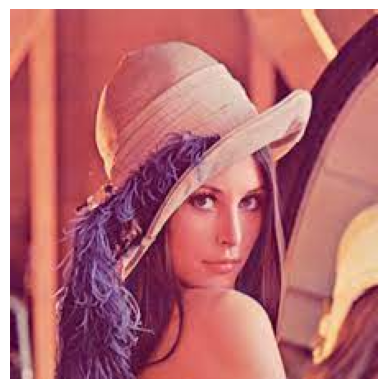

In [79]:
img_src = cv2.imread('lena.jpeg', 1)
img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
plt.imshow(img_src)
plt.axis('off')

In [36]:
# Check the image matrix data type (could know the bit depth of the image)
print(img_src.dtype)
# Check the height of image
print(img_src.shape[0])
# Check the width of image
print(img_src.shape[1])
# Check the number of channels of the image
print(img_src.shape[2])

uint8
225
224
3


## Color channels

By default opencv uses BGR color channels

Use cv2.cvtColor() function to convert the color space to RGB and grayscale and display the resulting images.

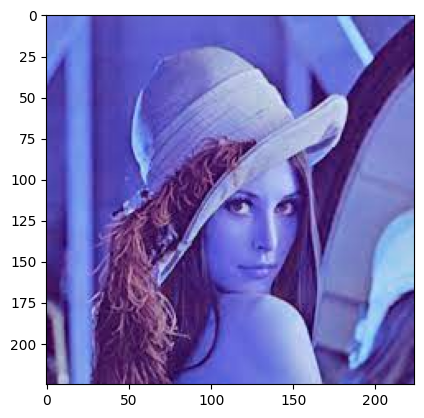

In [37]:
img1 = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

## Convolution

Use the convolve2D function to apply several filters to the image.

Apply Sobel filters, Gaussian, edge detector and display the results.

Explain the padding and strides parameters.


In [20]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 321.  -1. ...   0.   0.   0.]
 [  0. 480.  -2. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


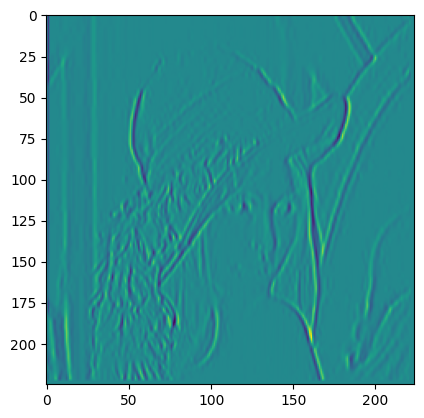

In [39]:
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
img = convolve2D(img, kernel=kernel, padding=1, strides=1)
plt.imshow(img)

## Bluring and edge detection

As an alternative you can use openCV function for Blur and edge detection.

Apply cv2.GaussianBlur() and cv2.Canny()



(np.float64(-0.5), np.float64(223.5), np.float64(224.5), np.float64(-0.5))

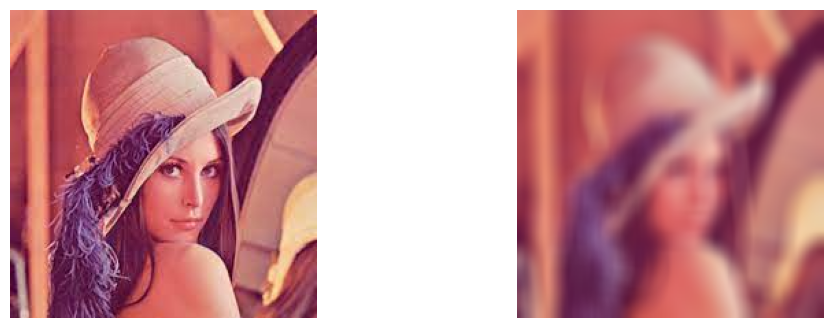

In [55]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_src)
plt.axis("off")
plt.subplot(1, 2, 2)
img1 = cv2.GaussianBlur(img_src, (15, 15), 20)
plt.imshow(img1)
plt.axis("off")

## Contours detection
Detect contours with plt.contour and cv2.findContours()



(np.float64(0.0), np.float64(2.0), np.float64(0.0), np.float64(223.0))

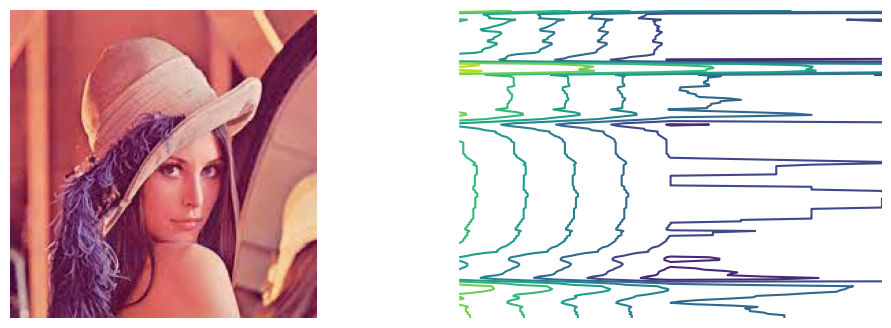

In [62]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_src)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.contour(img_src[1])
plt.axis("off")

## Optional:
Play around with resizing and cropping: cv2.resize()

Cropping can be achieved by using the image data as a numpy array.

(np.float64(-0.5), np.float64(49.5), np.float64(49.5), np.float64(-0.5))

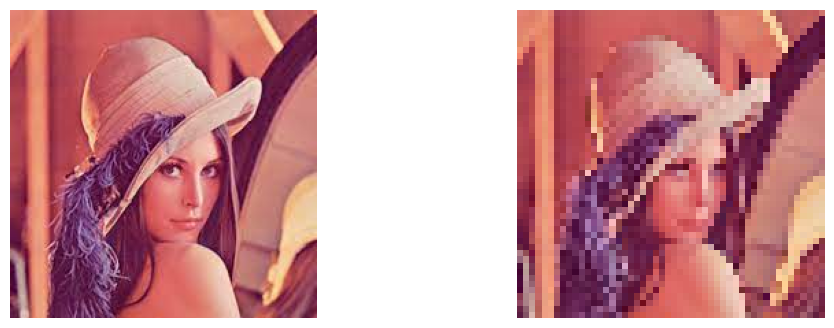

In [73]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_src)
plt.axis("off")
plt.subplot(1, 2, 2)
img_resize = cv2.resize(img_src, (50, 50))
plt.imshow(img_resize)
plt.axis("off")

## Optional
Play around with a blank image

Then draw a line, a rectangle, circle, and text. line(), rectangle, circle, putText function can be used.

(np.float64(-0.5), np.float64(49.5), np.float64(49.5), np.float64(-0.5))

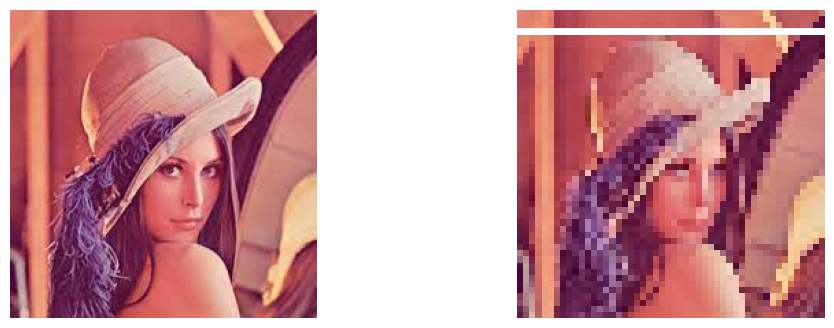

In [74]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_src)
plt.axis("off")
plt.subplot(1, 2, 2)
img_resize = cv2.resize(img_src, (50, 50))
img_resize[3] = np.ones((50, 3)) * 255
plt.imshow(img_resize)
plt.axis("off")

## Optional:
Play around: normalize the pixel values to [0,1] square or squareroot the values and transform them back to [0,255], then display the resulting images.

(np.float64(-0.5), np.float64(223.5), np.float64(224.5), np.float64(-0.5))

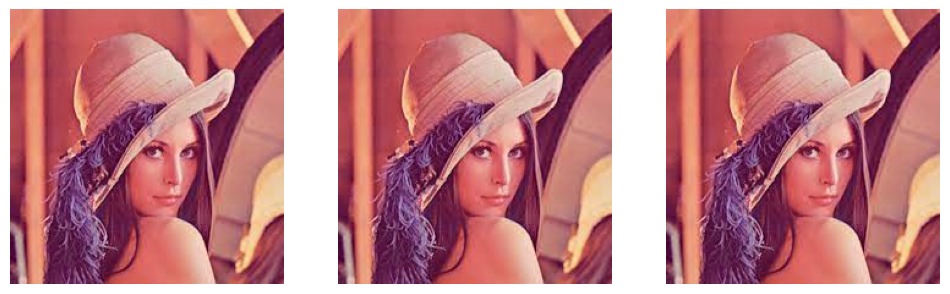

In [88]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_src)
plt.axis("off")
plt.subplot(1, 3, 2)
img_2 = img_src / 255
plt.imshow(img_2)
plt.axis("off")
plt.subplot(1, 3, 3)
img_3 = (img_2 * 255).astype(int)
plt.imshow(img_3)
plt.axis("off")

## Feature point detection.

Use cv2.cornerHarris(), cv2.goodFeaturesToTrack(), cv2.FastFeatureDetector, and cv2.ORB to detect and display feature points on an image


In [89]:
# à faire

## Matching

read img1.ppm and img2.ppm.

After computing feature points, perform matching using cv2.BFMatcher or cv2.FlannBasedMatcher

Display the two images side by side and draw a line between matched points.

(np.float64(-0.5), np.float64(799.5), np.float64(639.5), np.float64(-0.5))

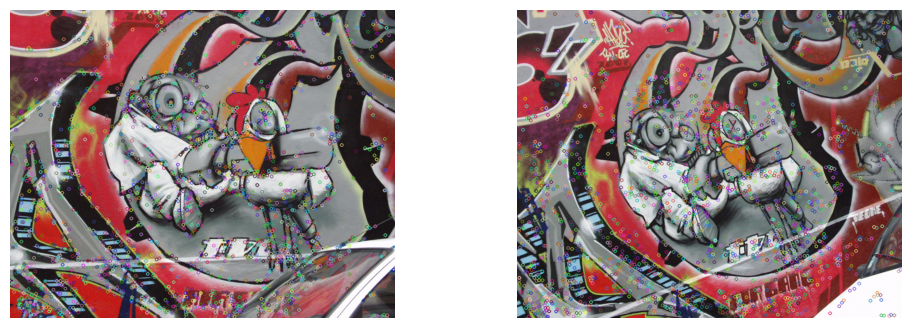

In [99]:
plt.figure(figsize=(12, 4))

img1_ppm = cv2.imread('img1.ppm')
img2_ppm = cv2.imread('img2.ppm')

img1_ppm = cv2.cvtColor(img1_ppm, cv2.COLOR_BGR2RGB)
img2_ppm = cv2.cvtColor(img2_ppm, cv2.COLOR_BGR2RGB)

sift = cv2.SIFT_create()
kp = sift.detect(img1_ppm,None)
img1_kp = cv2.drawKeypoints(img1_ppm,kp,img)

sift = cv2.SIFT_create()
kp = sift.detect(img1_ppm,None)
img2_kp = cv2.drawKeypoints(img2_ppm,kp,img)

plt.subplot(1, 2, 1)
plt.imshow(img1_kp)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img2_kp)
plt.axis("off")

## Optional

compute the homography.

Use ransac algorithm.

apply transformation to the second image to match the first image viewpoint.

In [100]:
# à faire

# PART 2: Image embeddings for classification

## Build Your dataset


Take the first 300 digits as your dataset.

Reshape the image data into 28*28 images and display one of them using cv2_imshow


In [110]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

mnist = fetch_openml('mnist_784', cache=False)

print(mnist.data.shape)
print(mnist.target.shape)
print(np.unique(mnist.target))
mnist.data = mnist.data[:300]
mnist.target = mnist.target[:300]
mnist.data /= 255

(70000, 784)
(70000,)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


## Extract dense features

For each image extract dense daisy features using the following code.

More information on daisy can be found here: https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_daisy.html

Make sure you reshape the output to obtain a 2d array per image (nb features * feature dimension)

In [117]:
import torch
from torchvision import datasets, transforms
from joblib import Parallel, delayed
from skimage.feature import daisy
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [118]:
def process_image(img):
    img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0).to(device)
    img_cpu = img_tensor.squeeze().cpu().numpy()
    _, descs_img = daisy(img_cpu, step=2, radius=8, rings=2, histograms=6, orientations=8, visualize=True)
    return descs_img

In [120]:
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [121]:
num_images = 300
mnist_images = mnist_dataset.data[:num_images].numpy()
descs_imgs = Parallel(n_jobs=8)(delayed(process_image)(img) for img in tqdm(mnist_images))


100%|██████████| 300/300 [00:12<00:00, 23.64it/s]


ValueError: cannot reshape array of size 2352 into shape (28,28)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0810683].


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

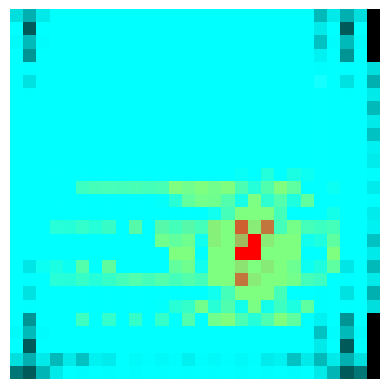

In [124]:
current_img = descs_imgs[0]
plt.imshow(current_img)
plt.axis("off")

## Normalization

Perform l2 normalization on each feature descriptor.

In [130]:
descs_imgs = np.array(descs_imgs) / np.sum(descs_imgs) ** 2


In [131]:
np.sum(np.power(descs_imgs[0,0,:],2.0))

np.float32(7.534232e-17)

## Clustering and embeddings

Look and try to understand the following codes.
These aggregators include the clustering.

After dividing your data into train and test set, perform the clustering with k=100 clusters on all the features of the train set.

Then, compute the bow and vlad descriptors for each image of the train and test sets.

Pay attention to the normalization apllied on the computed embeddings.

In [132]:
from sklearn.base import BaseEstimator


class BaseAggregator(BaseEstimator):
    """Implement any functions that can be shared among all feature
    aggregation methods."""

    def __init__(self, dimension_ordering="tf"):
        self.dimension_ordering = dimension_ordering

    def _reshape_local_features(self, X):
        """Reshape a n-dimensional array into a 2d array of local features.
        Account for the case that X is a list because not all samples have
        the same number of local features.
        """
        if len(X) == 0:
            raise ValueError("X cannot be empty")

        dims = len(X[0]) if self.dimension_ordering == "th" else X[0].shape[-1]
        if isinstance(X, list):
            arrays = [
                x.T.reshape(-1, dims)
                if self.dimension_ordering == "th"
                else x.reshape(-1, dims)
                for x in X
            ]
            lengths = [len(x) for x in arrays]
            X = np.vstack(arrays)
        else:
            if self.dimension_ordering == "th":
                X = X.transpose(*([0] + range(2, len(X.shape)) + [1]))
            lengths = [int(np.prod(X.shape[1:-1]))]*X.shape[0]
            X = X.reshape(-1, dims)

        return X, lengths

In [133]:
"""Quantize local features and aggregate them in a Bag Of Words manner"""

import numpy as np
from sklearn import cluster

#from .base import BaseAggregator


class BagOfWords(BaseAggregator):
    """Compute a Bag of Words model and aggregate local features with it.

    Train a MiniBatchKMeans on the data and then use the centroids as a
    codebook to encode any set of local features.
    Parameters
    ----------
    n_codewords : int
                  The codebook size aka the number of clusters
    l1_norm : boolean
              Whether to normalize the transformed data or not
    dimension_ordering : {'th', 'tf'}
                         Changes how n-dimensional arrays are reshaped to form
                         simple local feature matrices. 'th' ordering means the
                         local feature dimension is the second dimension and
                         'tf' means it is the last dimension.
    """
    def __init__(self, n_codewords, l1_norm=True, dimension_ordering="tf"):
        self.n_codewords = n_codewords
        self.l1_norm = l1_norm
        self._clusterer = cluster.MiniBatchKMeans(
            n_clusters=self.n_codewords,
            n_init=1,
            compute_labels=False
        )

        super(self.__class__, self).__init__(dimension_ordering)

    @property
    def centroids(self):
        """The centroids of the encoding"""
        return self._clusterer.cluster_centers_.copy()

    @centroids.setter
    def centroids(self, _centroids):
        self._clusterer.cluster_centers_ = _centroids.copy()

    def fit(self, X, y=None):
        """Build the codebook for the Bag of Words model.
        Apply the clustering algorithm to the data and use the cluster centers
        as codewords for the codebook.
        Parameters:
        -----------
        X : array_like or list
            The local features to train on. They must be either nd arrays or
            a list of nd arrays.
        """
        X, _ = self._reshape_local_features(X)

        self._clusterer.fit(X)

        return self

    def partial_fit(self, X, y=None):
        """Partially learn the codebook from the provided data.
        Run a single iteration of the minibatch KMeans on the provided data.
        Parameters:
        -----------
        X : array_like or list
            The local features to train on. They must be either nd arrays or
            a list of nd arrays.
        """
        X, _ = self._reshape_local_features(X)
        self._clusterer.partial_fit(X)

        return self

    def transform(self, X):
        """Compute the Bag of Words representation of the provided data.

        Parameters
        ----------
        X : array_like or list
            The local features to aggregate. They must be either nd arrays or
            a list of nd arrays. In case of a list each item is aggregated
            separately.
        """
        # Get the local features and the number of local features per document
        X, lengths = self._reshape_local_features(X)

        # Preprocess the lengths list into indexes in the local feature array
        starts = np.cumsum([0] + lengths).astype(int)
        ends = np.cumsum(lengths).astype(int)

        # Transform and aggregate the local features
        words = self._clusterer.predict(X)
        bow = np.vstack([
            np.histogram(
                words[s:e],
                bins=np.arange(self.n_codewords + 1) - 0.5,
                density=False
            )[0]
            for s, e in zip(starts, ends)
        ])

        if self.l1_norm:
            bow = bow.astype(float) / bow.sum(axis=1).reshape(-1, 1)

        return bow

    def inertia(self, X):
        """Return the value of the KMeans objective function on the provided
        data.
        X : array_like or list
            The local features to train on. They must be either nd arrays or
            a list of nd arrays.
        """
        X, _ = self._reshape_local_features(X)

        return -self._clusterer.score(X)

    def score(self, X, y=None):
        """Return the negative inertia so that the best score is the max
        score.
        X : array_like or list
            The local features to train on. They must be either nd arrays or
            a list of nd arrays.
        """
        return -self.inertia(X)

## Optional:

Similarly compute VLAD embeddings

In [ ]:
"""Quantize local features and aggregate them using the Vector of Locally
Aggregated Descriptors (VLAD) encoding"""

from sklearn import cluster



class Vlad(BaseAggregator):
    """Compute a VLAD model and aggregate local features with it.
    Parameters
    ----------
    n_codewords: int
                 The codebook size aka the number of clusters.
    inner_batch: int
                 The batch size used to compute the differences between
                 the feature descriptors and the centroids.
    normalization: int
                   A bitmask of possible normalizations
    dimension_ordering : {'th', 'tf'}
                         Changes how n-dimensional arrays are reshaped to form
                         simple local feature matrices. 'th' ordering means the
                         local feature dimension is the second dimension and
                         'tf' means it is the last dimension.
    """


    POWER_NORMALIZATION = 1
    L2_NORMALIZATION = 2

    def __init__(self, n_codewords, normalization=3, inner_batch=128,
                 dimension_ordering="tf"):
        self.n_codewords = n_codewords
        self.inner_batch = inner_batch
        self.normalization = normalization

        self._clusterer = cluster.MiniBatchKMeans(
            n_clusters=self.n_codewords,
            n_init=1,
            compute_labels=False
        )

        super(self.__class__, self).__init__(dimension_ordering)

    def fit(self, X, y=None):
        """Build the codebook for the VLAD model using KMeans.
        Apply the clustering algorithm to the data and use the cluster centers
        as codewords for the codebook.
        Parameters:
        -----------
        X : array_like or list
            The local features to train on. They must be either nd arrays or
            a list of nd arrays.
        """
        X, _ = self._reshape_local_features(X)

        self._clusterer.fit(X)

        return self

    def partial_fit(self, X, y=None):
        """Partially learn the codebook from the provided data.
        Run a single iteration of the minibatch KMeans on the provided data.
        Parameters:
        -----------
        X : array_like or list
            The local features to train on. They must be either nd arrays or
            a list of nd arrays.
        """
        X, _ = self._reshape_local_features(X)
        self._clusterer.partial_fit(X)

        return self

    def transform(self, X):
        """Compute the Bag of Words representation of the provided data.
        Parameters
        ----------
        X : array_like or list
            The local features to aggregate. They must be either nd arrays or
            a list of nd arrays. In case of a list each item is aggregated
            separately.
        """
        # Get the local features and the number of local features per document
        X, lengths = self._reshape_local_features(X)

        # Preprocess the lengths list into indexes in the local feature array
        starts = np.cumsum([0] + lengths).astype(int)
        ends = np.cumsum(lengths).astype(int)

        words = self._clusterer.predict(X)
        dims = len(X[0])

        vlad = np.zeros((len(lengths), dims*self.n_codewords))
        v = np.zeros((self.inner_batch, self.n_codewords, dims))
        for i, (s, e) in enumerate(zip(starts, ends)):
            for j in range(s, e, self.inner_batch):
                ee = min(j+self.inner_batch, e)

                v.fill(0)
                v[range(ee-j), words[j:ee]] = \
                    X[j:ee] - self._clusterer.cluster_centers_[words[j:ee]]
                vlad[i] += v[:ee-j].sum(axis=0).ravel()
            vlad[i] /= lengths[i]

        # Check if we should be normalizing the power
        if self.normalization & self.POWER_NORMALIZATION:
            vlad = np.sqrt(np.abs(vlad))*np.sign(vlad)

        # Check if we should be performing L2 normalization
        if self.normalization & self.L2_NORMALIZATION:
            vlad /= np.sqrt(np.sum(vlad**2, axis=1)).reshape(-1, 1)

        return vlad

## Classification with SVM

For BOW and VLAD perform classification of the small MNIST dataset with linear SVMs.

Make sure your descriptors are L2-normalized and use sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- give results for all encoding and various C values.
- compare BOW and VLAD to using the full image (flatten) as input.
- compute the kernels on train and test sets and compute the SVM again



In [137]:
X_train, X_test, y_train, y_test = train_test_split(descs_imgs, mnist.target[:300], shuffle=True, test_size=0.3)
X_train.shape, X_test.shape

((210, 28, 28, 3), (90, 28, 28, 3))

In [138]:
from sklearn import svm

## Optional

Using feature-aggregation code: https://github.com/paschalidoud/feature-aggregation/tree/master/feature_aggregation

Compute fisher vectors for the dataset and evaluate its classifcation performance.

## Optional

Evaluate different number of clusters and normalization strategies for the studied embeddings